In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.linear_model import HuberRegressor,PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Load your dataset into a DataFrame (replace 'your_data.csv' with the actual filename)
test = pd.read_csv('test_withF_VT_Avg_1min_FULL.csv', index_col='Timestamp')
train = pd.read_csv('train_withF_VT_Avg_1min_FULL.csv', index_col='Timestamp')


# targetName = 'Target_Close_1min'
targetName = 'Target_Avg_1min'

X = train.drop(columns=[targetName])  # Drop columns you don't need for modeling
y = train[targetName]

# Initialize a model
model = ExtraTreesRegressor()

# Fit the model
model.fit(X, y)

predictions = model.predict(test.drop(columns=[targetName]))

r2 = r2_score(test[targetName], predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test[targetName], predictions)

# Print the metrics
print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')


R-squared: 0.0237
Mean Squared Error (MSE): 0.0000


<Axes: >

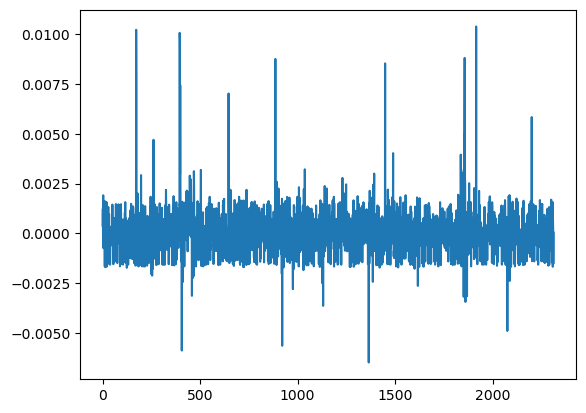

In [34]:
pd.Series(predictions).plot()

In [24]:
min_value = pd.Series(predictions).min()
max_value = pd.Series(predictions).max()

print('Predict min: ' + str(min_value))
print('Predict max: ' + str(max_value))

Predict min: -0.014687439916876478
Predict max: 0.027407078469323873


In [4]:
test['prediction_label'] = predictions

In [5]:
test.to_csv("result_Close_1min.csv")